In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')

### Read and inspect the data

In [2]:
customers_df = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
customers_df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


### Data Wrangling

In [4]:
customers_df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

Data does not have null values so can move ahead.

### EDA

__1) For X1__

<Axes: xlabel='X1', ylabel='count'>

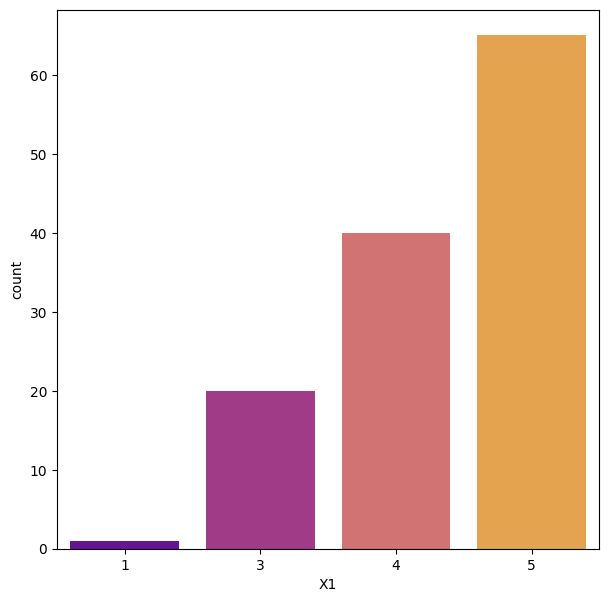

In [5]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'X1', data = customers_df, palette = 'plasma')

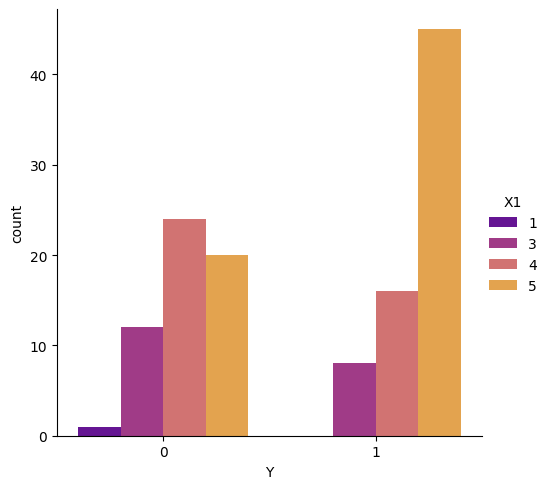

In [6]:
# S
sns.catplot(x = 'Y', kind = 'count', hue = 'X1', data = customers_df, palette = 'plasma')

Now checking for outliers if any

<Axes: ylabel='X1'>

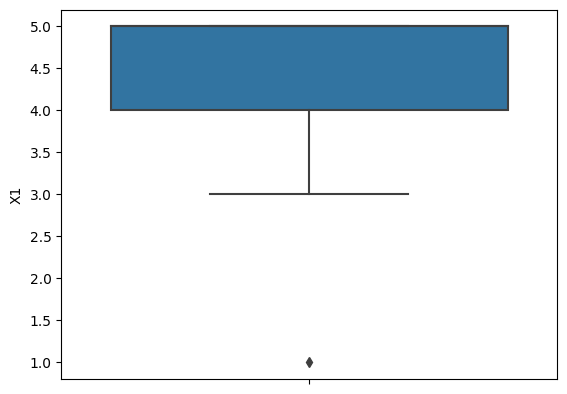

In [7]:
sns.boxplot(y=customers_df['X1'])

In [8]:
customers_df.loc[customers_df['X1'] == 1]

,Y,X1,X2,X3,X4,X5,X6
47,0,1,1,1,3,1,4


Can remove this row and check accuracy later

**2) For X2**

<Axes: xlabel='X2', ylabel='count'>

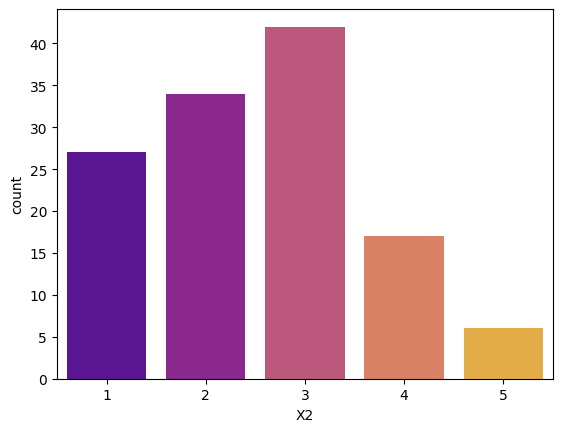

In [9]:
sns.countplot(x = 'X2', data = customers_df, palette = 'plasma')

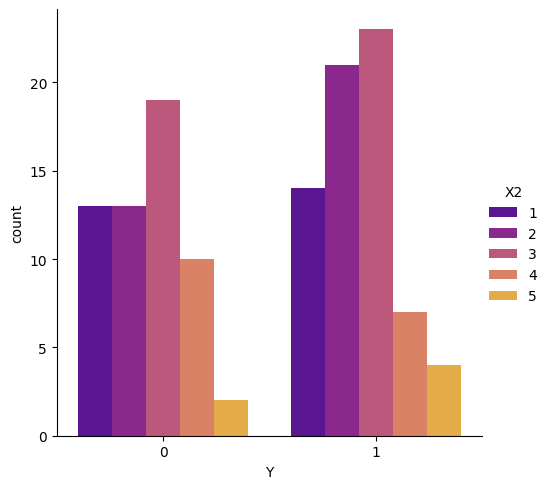

In [10]:
sns.catplot(x = 'Y', kind = 'count', hue = 'X2', data = customers_df, palette = 'plasma')

<Axes: ylabel='X2'>

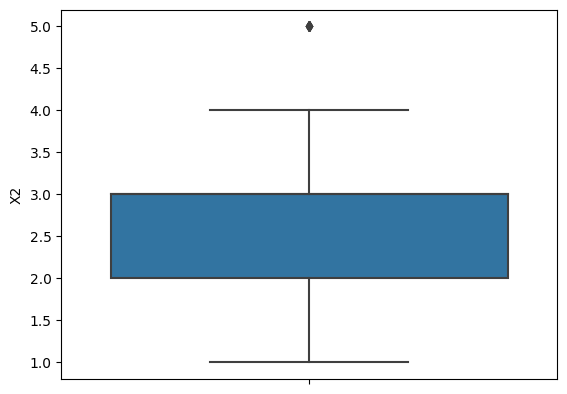

In [11]:
sns.boxplot(y=customers_df['X2'])

In [12]:
customers_df.loc[customers_df['X2'] == 5]

,Y,X1,X2,X3,X4,X5,X6
5,1,5,5,3,5,5,5
63,0,5,5,5,2,5,5
71,0,4,5,5,5,1,3
79,1,5,5,5,5,5,5
95,1,5,5,5,5,5,5
119,1,5,5,1,1,5,1


**3) For X3**

<Axes: xlabel='X3', ylabel='count'>

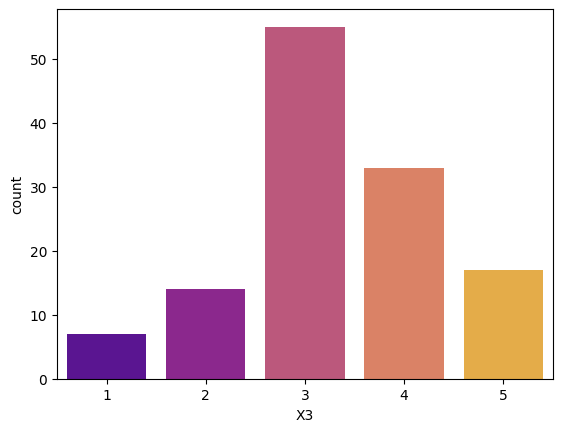

In [13]:
sns.countplot(x = 'X3', data = customers_df, palette = 'plasma')

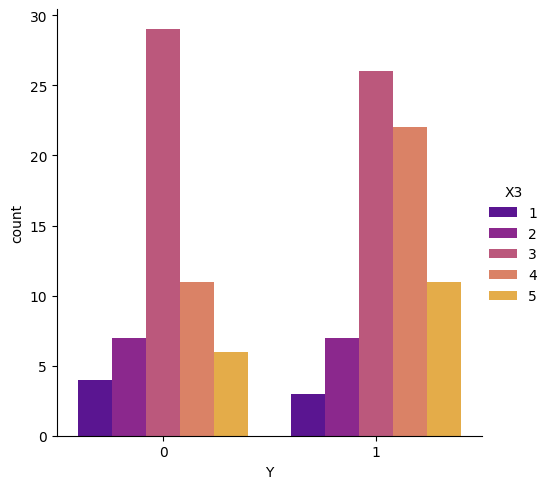

In [14]:
sns.catplot(x = 'Y', kind = 'count', hue = 'X3', data = customers_df, palette = 'plasma')

<Axes: ylabel='X3'>

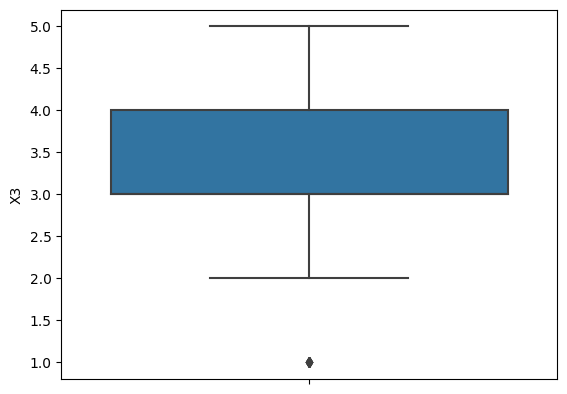

In [15]:
sns.boxplot(y=customers_df['X3'])

In [16]:
customers_df.loc[customers_df['X3'] == 1]

,Y,X1,X2,X3,X4,X5,X6
27,1,3,3,1,3,3,4
28,1,3,3,1,3,3,4
47,0,1,1,1,3,1,4
56,0,5,1,1,5,3,5
67,0,4,1,1,3,4,4
89,0,3,3,1,3,2,3
119,1,5,5,1,1,5,1


**4) For X4**

<Axes: xlabel='X4', ylabel='count'>

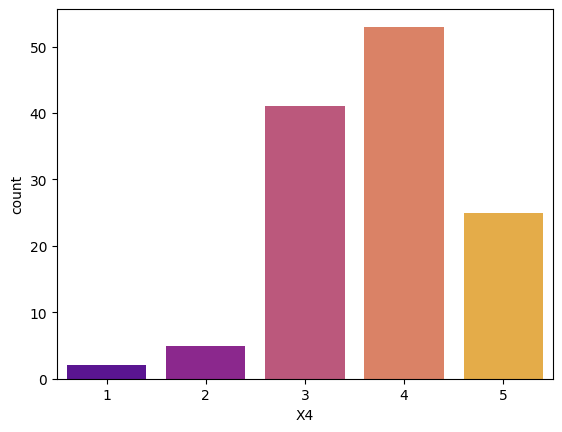

In [17]:
sns.countplot(x = 'X4', data = customers_df, palette = 'plasma')

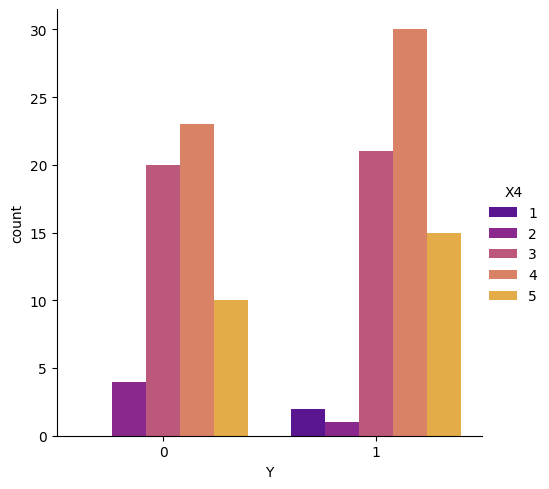

In [18]:
sns.catplot(x = 'Y', kind = 'count', hue = 'X4', data = customers_df, palette = 'plasma')

<Axes: ylabel='X4'>

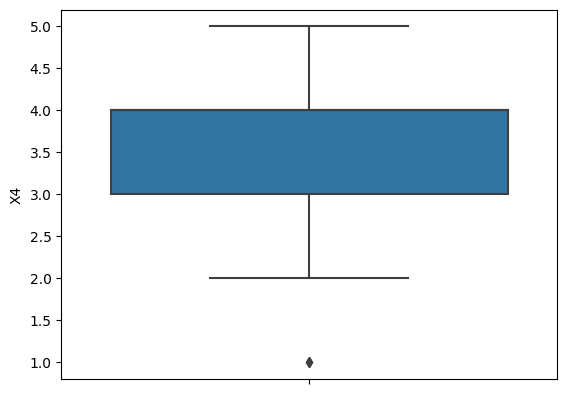

In [19]:
sns.boxplot(y=customers_df['X4'])

In [20]:
customers_df.loc[customers_df['X4'] == 1]

,Y,X1,X2,X3,X4,X5,X6
34,1,4,1,3,1,1,4
119,1,5,5,1,1,5,1


**5) For X5**

<Axes: xlabel='X5', ylabel='count'>

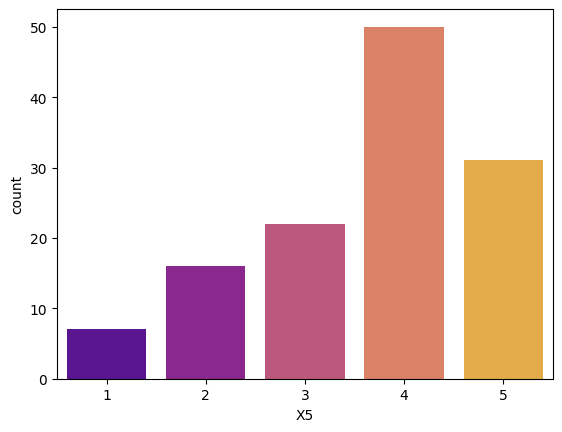

In [21]:
sns.countplot(x = 'X5', data = customers_df, palette = 'plasma')

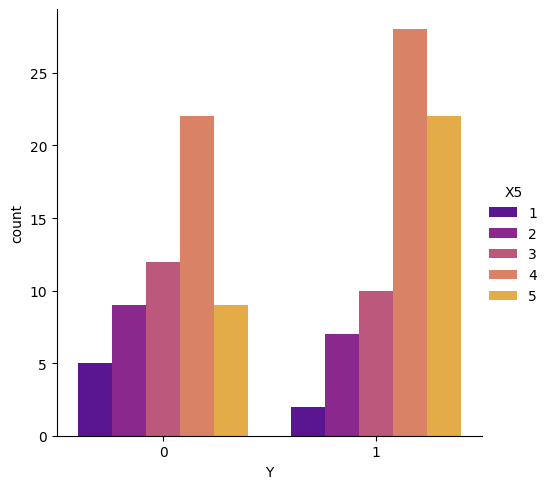

In [22]:
sns.catplot(x = 'Y', kind = 'count', hue = 'X5', data = customers_df, palette = 'plasma')

<Axes: ylabel='X5'>

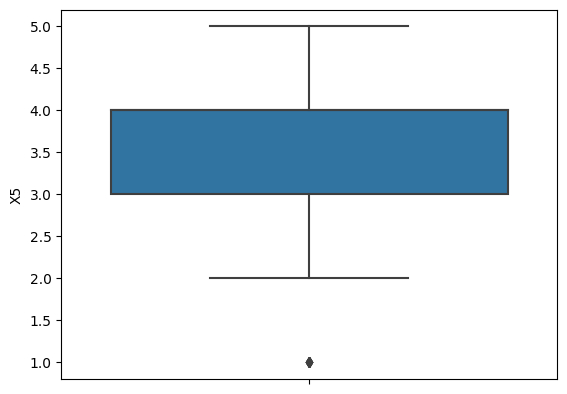

In [23]:
sns.boxplot(y=customers_df['X5'])

In [24]:
customers_df.loc[customers_df['X5'] == 1]

,Y,X1,X2,X3,X4,X5,X6
6,0,3,1,2,2,1,3
34,1,4,1,3,1,1,4
47,0,1,1,1,3,1,4
71,0,4,5,5,5,1,3
94,0,3,1,3,2,1,2
116,1,3,4,4,5,1,3
120,0,4,4,4,4,1,3


**6) For X6**

<Axes: xlabel='X6', ylabel='count'>

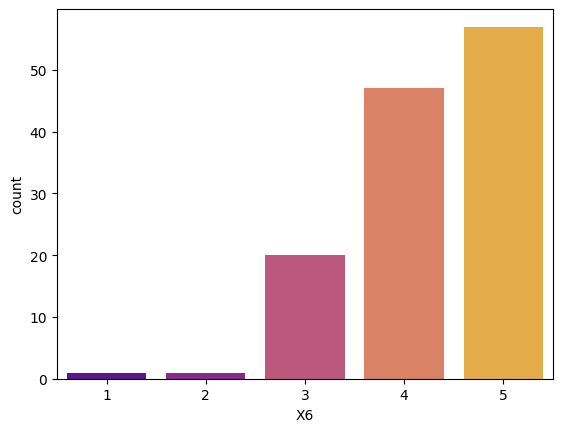

In [25]:
sns.countplot(x = 'X6', data = customers_df, palette = 'plasma')

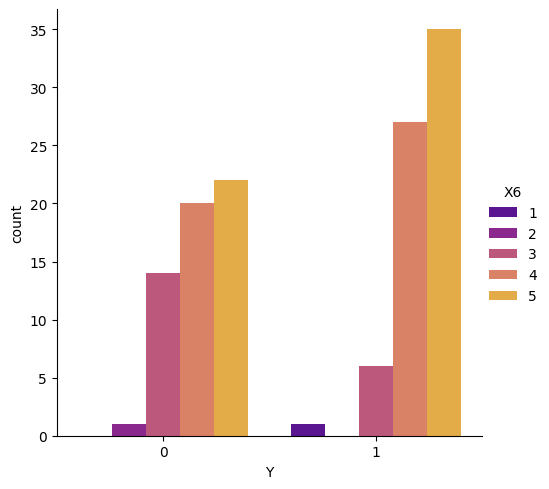

In [26]:
sns.catplot(x = 'Y', kind = 'count', hue = 'X6', data = customers_df, palette = 'plasma')

<Axes: ylabel='X6'>

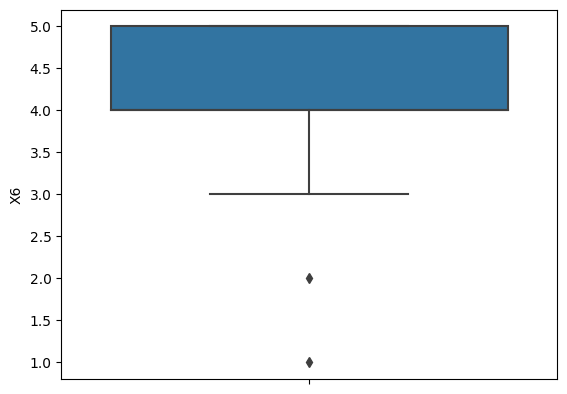

In [27]:
sns.boxplot(y=customers_df['X6'])

In [28]:
customers_df.loc[customers_df['X6'].isin([1,2])]

,Y,X1,X2,X3,X4,X5,X6
94,0,3,1,3,2,1,2
119,1,5,5,1,1,5,1


### Correlation

1) Between features

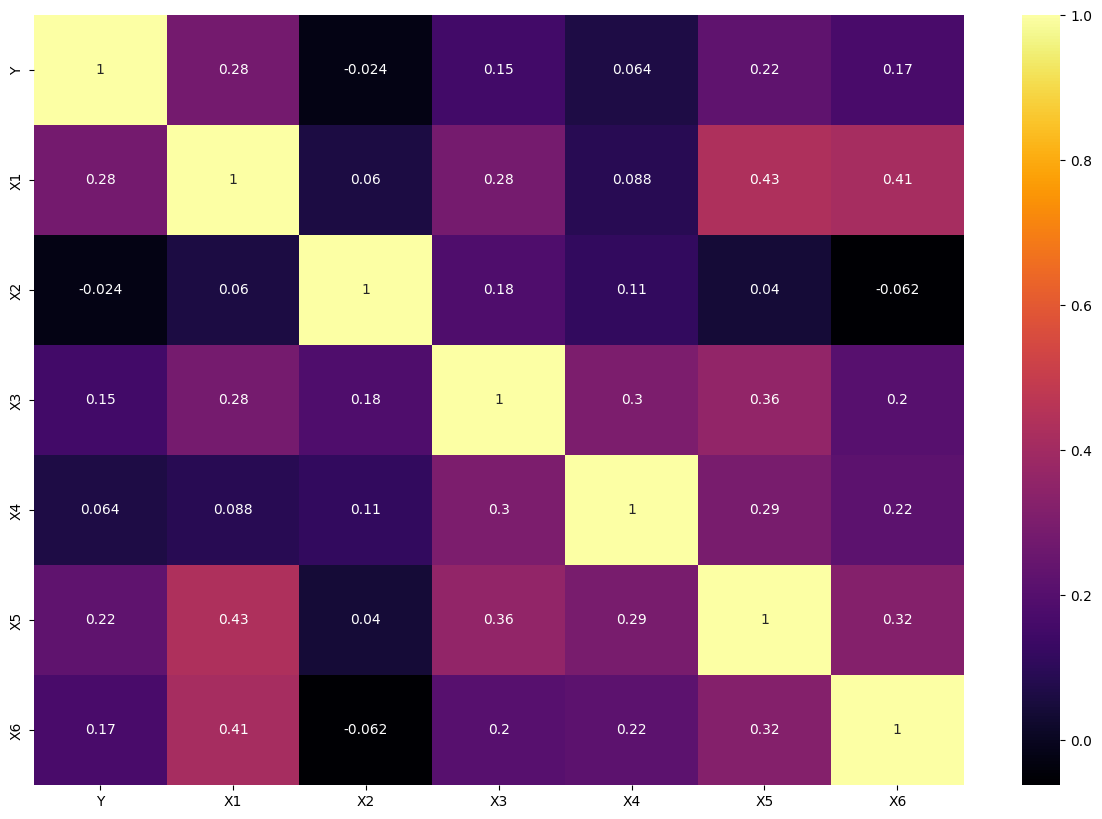

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(customers_df.corr(), annot = True, cmap = 'inferno')
plt.show()

Here we see that values are not closer to 1 , which means there are no
features which have a high correlation with each other and thus, we are
not removing any of the features.

2) With Output

<Axes: >

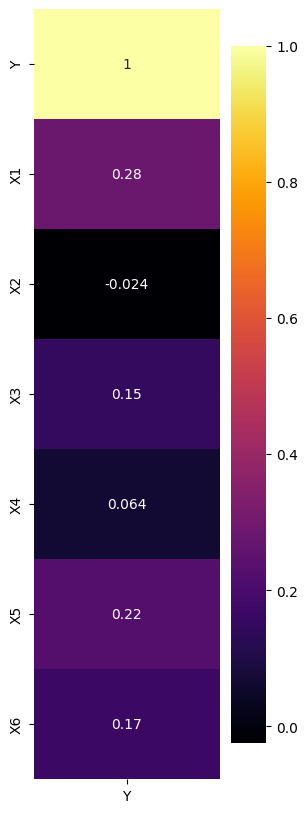

In [30]:
plt.figure(figsize= (3,10))
sns.heatmap(customers_df.corr()[['Y']], annot=True, cmap= 'inferno')

### ML Model Building

As the problem is a classification problem, we start by building a baseline model using logistic regression and will explore the results.

#### 1) Logistic Regression

In [31]:
data = customers_df.copy()
data.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [32]:
target = ['Y']
x = data[data.columns.difference(target)]
y = data[target]

In [33]:
x.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [34]:
y.head()

,Y
0,0
1,0
2,1
3,0
4,0


In [35]:
## Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=125)

In [36]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='lbfgs', C=1e4, max_iter=1000, penalty='l2')

In [37]:
logit_model.fit(x_train, y_train)

LogisticRegression(C=10000.0, max_iter=1000)

In [38]:
logit_model.score(x_test, y_test)

0.5384615384615384

2) Various other ML models

In [39]:
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifiers = []

In [40]:
model1 = xgb.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [41]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred= clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) is 0.5769230769230769
Confusion Matrix of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
       

#### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train);

In [43]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(x_test)

accuray = accuracy_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)


Accuracy: 0.5384615384615384
F1 Score: 0.5471153846153846


#### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=30)

In [45]:
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)


Accuracy: 0.5384615384615384
F1 Score: 0.5471153846153846


#### Going with **Random forest** classifier hyperparameter tuning as baseline model accuracy is highest

In [46]:
random_forest = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators = 100, 
                               max_depth=None, class_weight= {False: 0.38, True: 0.62})

In [47]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(class_weight={False: 0.38, True: 0.62},
                       criterion='entropy')

In [48]:
random_forest.score(x_test,y_test)

0.7307692307692307

In [49]:
random_forest.score(x_train, y_train)

0.94

In [50]:
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# param_grid = {
#     'n_estimators': [25, 50, 100, 150], 
#     'max_features': ['sqrt', 'log2', 'auto'],
#      'max_depth': [6, 10, 15, 20, 25, 30, 35, 40],
#      'min_samples_split' : [2, 6, 10], 
#     'max_leaf_nodes': [3, 6, 9],
#     'bootstrap' : [True, False],
#     'class_weight' : [{False: 0.38, True: 0.62}]
# }

# random_search = RandomizedSearchCV(RandomForestClassifier(),
#                                    param_grid)
# random_search.fit(x_train, y_train)
# print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=False, class_weight={False: 0.38, True: 0.62},
                       max_depth=20, max_features='log2', max_leaf_nodes=9)


In [51]:
# random_forest = RandomForestClassifier(bootstrap=False, class_weight={False: 0.38, True: 0.62},
#                        max_depth=30, max_features='log2', max_leaf_nodes=6,
#                        min_samples_split=10, n_estimators=150)

# random_forest.fit(x_train, y_train)
# y_pred = random_forest.predict(x_test)
# acc = accuracy_score(y_test, y_pred)

# print("Accuracy:", accuray)

Accuracy: 0.5384615384615384


### Using ANN for the same

In [52]:
# build NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [105]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(6,)))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [106]:

# Fitting the ANN to the Training set
model.fit(x_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

In [107]:
score, acc = model.evaluate(x_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

10/10 [==============================] - 0s 4ms/step - loss: 0.5836 - accuracy: 0.7000
Train score: 0.5835932493209839
Train accuracy: 0.699999988079071


In [108]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)


1/1 [==============================] - 0s 92ms/step
********************
3/3 [==============================] - 0s 4ms/step - loss: 0.7917 - accuracy: 0.4615
Test score: 0.7917103171348572
Test accuracy: 0.4615384638309479


### Tuning the ANN

In [110]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(6,)))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate=1e-3, beta_1=0.89, beta_2 = 0.9), loss = 'binary_crossentropy', metrics = ['accuracy'])


In [114]:
# Fitting the ANN to the Training set
history = model.fit(x_train, y_train, batch_size = 10, epochs = 200,verbose = 0)

In [115]:
score, acc = model.evaluate(x_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

10/10 [==============================] - 0s 5ms/step - loss: 0.3366 - accuracy: 0.8400
Train score: 0.3366198241710663
Train accuracy: 0.8399999737739563


In [117]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

1/1 [==============================] - 0s 90ms/step
********************
3/3 [==============================] - 0s 8ms/step - loss: 1.2344 - accuracy: 0.5000
Test score: 1.234417200088501
Test accuracy: 0.5


In [129]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


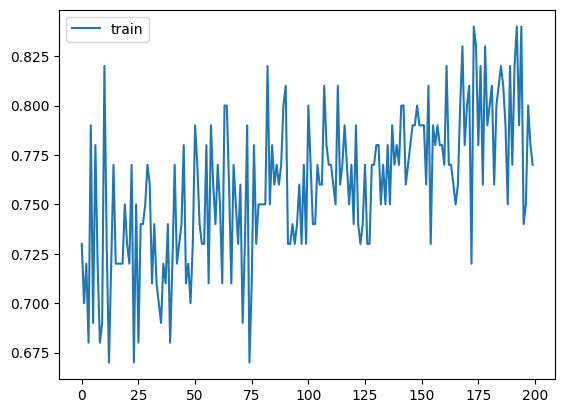

In [130]:
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

### Bonus

1) Inspecting X1

In [132]:
d = customers_df[['X1', 'Y']]
d.groupby(['Y']).mean()


,X1
Y,
0,4.087719
1,4.536232


X1 doesnt have significant impact on Y.

2) Inspecting X2

In [133]:
d = customers_df[['X2', 'Y']]
d.groupby(['Y']).mean()

,X2
Y,
0,2.561404
1,2.507246


3) Inspecting X3

In [134]:
d = customers_df[['X3', 'Y']]
d.groupby(['Y']).mean()

,X3
Y,
0,3.140351
1,3.449275


4) Inspecting X4

In [135]:
d = customers_df[['X4', 'Y']]
d.groupby(['Y']).mean()

,X4
Y,
0,3.684211
1,3.797101


5) Inspecting X5

In [136]:
d = customers_df[['X5', 'Y']]
d.groupby(['Y']).mean()

,X5
Y,
0,3.368421
1,3.884058


6) Inspecting X6

In [137]:
d = customers_df[['X6', 'Y']]
d.groupby(['Y']).mean()

,X6
Y,
0,4.105263
1,4.376812


<Axes: >

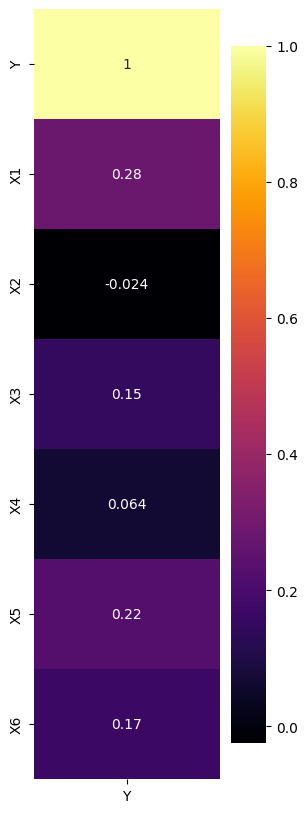

In [138]:
plt.figure(figsize= (3,10))
sns.heatmap(customers_df.corr()[['Y']], annot=True, cmap= 'inferno')

From the above matrix and mean values, we can infer following:
1) X2 and X4 features are closer to zero, meaning they are less correlated to the target 'Y' and can be eliminated from the feature set if there were more number of features. 
2) X1, X3, X5, X6 are needed primarliy as they are of more importance.